In [94]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression

In [5]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x, "shape:", x.shape)
print(y, "shape:", y.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] shape: (10, 1)
[0 0 0 0 1 1 1 1 1 1] shape: (10,)


In [9]:
model = LogisticRegression(solver="liblinear", random_state=0)

model.fit(x, y)

prediction =  model.predict(x)

In [10]:
print("List of classess:", model.classes_)

List of classess: [0 1]


In [11]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-1.04608067]
Coefficients: [[0.51491375]]


In [12]:
print("label:", y, sep="\n")
print("prediction:", prediction, sep="\n")

label:
[0 0 0 0 1 1 1 1 1 1]
prediction:
[0 0 0 1 1 1 1 1 1 1]


In [14]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [15]:
(1*model.coef_ + model.intercept_)

array([[-0.53116692]])

In [16]:
acc_score = model.score(x, y)
print("accuracy score:", acc_score)

accuracy score: 0.9


In [21]:
cm = confusion_matrix(y, prediction)

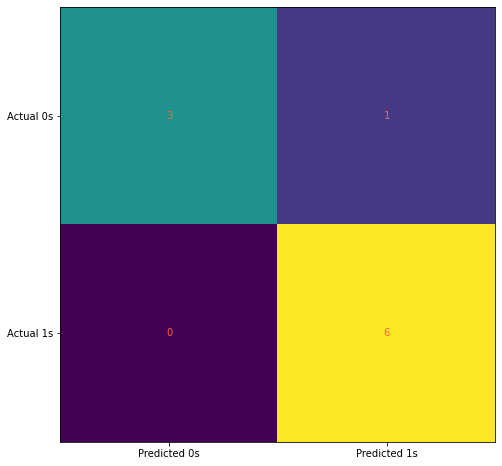

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="Tomato")
plt.show()

In [28]:
print(classification_report(y, prediction, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       1.00      0.75      0.86         4
        True       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Accuracy -> (TP + TN) / (TP + TN + FP +FN)


Precision -> **dari yg diprediksi positif, brp banyak yg sebenarnya positif**
> TP / (TP + FP)


Recall -> **dr yg sebenarnya positif, brp banyak yg berhasil diprediksi oleh model sbg positif**
> (TP + FN) / TP




# Handwriting Recognition

In [62]:
x, y = load_digits(return_X_y=True)

In [63]:
print("Dataset shape:", x.shape)
print("Target shape:", y.shape)

Dataset shape: (1797, 64)
Target shape: (1797,)


In [64]:
print("Sample image:")
print(x[0])

Sample image:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [65]:
images = x.reshape(-1, 8, 8)
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

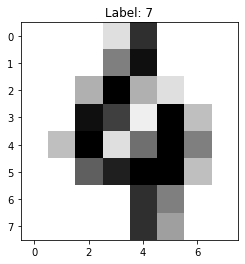

In [66]:
sample = np.random.randint(len(images))
plt.imshow(images[100], cmap=plt.cm.gray_r)
plt.title(f"Label: {y[sample]}")
plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [45]:
model = LogisticRegression(solver="liblinear", C=0.5,
multi_class="ovr",
                          random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.5, multi_class='ovr', random_state=0, solver='liblinear')

In [46]:
LogisticRegression(C=0.05, class_weight=None, dual=False,
fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None, max_iter=100,
                  multi_class="ovr", n_jobs=None, penalty="l2",
random_state=0, 
                   solver="liblinear", tol=0.0001, verbose=0,
warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [47]:
x_test = scaler.transform(x_test)

In [57]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [50]:
model.score(x_train, y_train)

0.9819067501739736

In [51]:
model.score(x_test, y_test)

0.9555555555555556

In [58]:
cm = confusion_matrix(y_test, y_pred_test)

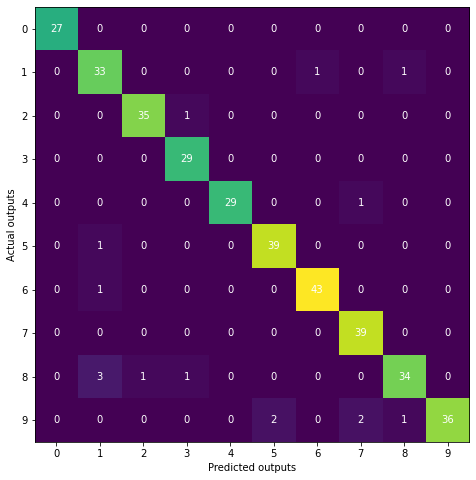

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted outputs", color="black")
ax.set_ylabel("Actual outputs", color="black")
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.show()

In [60]:
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      0.94      0.90        35
           2       0.97      0.97      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       0.98      0.98      0.98        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       1.00      0.88      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       0.94      0.99      0.97       147
           2       1.00      1.00      1.00       141
           3       0.99 

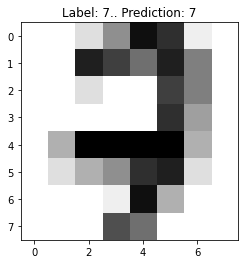

In [68]:
sample = np.random.randint(len(images))
prediction = model.predict(scaler.transform(x[sample].reshape(1, -1)))
plt.imshow(images[sample], cmap=plt.cm.gray_r)
plt.title(f"Label: {y[sample]}.. Prediction: {prediction[0]}")
plt.show()

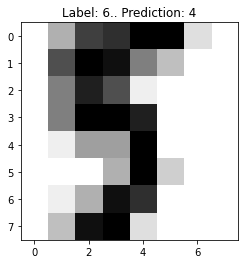

In [73]:
misclassified = np.where(y_test != y_pred_test)[0]
sample = np.random.randint(len(misclassified))
prediction = model.predict(scaler.transform(x_test[misclassified[0]].reshape(1, -1)))
plt.imshow(images[sample], cmap=plt.cm.gray_r)
plt.title(f"Label: {y_test[sample]}.. Prediction: {prediction[0]}")
plt.show()

# K-Nearest Neighbor (KNN)

In [78]:
wine = load_wine()

In [80]:
feature_names = wine.feature_names
target_names = wine.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


In [81]:
print("Data shape:", wine.data.shape)
print("Target shape:", wine.target.shape)

Data shape: (178, 13)
Target shape: (178,)


In [86]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.3, random_state=0)
print(f"Training with: {len(x_train)}.. Validating with: {len(x_test)}")

Training with: 124.. Validating with: 54


In [87]:
x_train[0], x_test[0]

(array([1.371e+01, 1.860e+00, 2.360e+00, 1.660e+01, 1.010e+02, 2.610e+00,
        2.880e+00, 2.700e-01, 1.690e+00, 3.800e+00, 1.110e+00, 4.000e+00,
        1.035e+03]),
 array([1.374e+01, 1.670e+00, 2.250e+00, 1.640e+01, 1.180e+02, 2.600e+00,
        2.900e+00, 2.100e-01, 1.620e+00, 5.850e+00, 9.200e-01, 3.200e+00,
        1.060e+03]))

In [95]:
# define kNN model
knn = KNeighborsClassifier(n_neighbors=7)

# train kNN -> store data and label
knn.fit(x_train, y_train)

# predict
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

# classification report
print("Training performance:",
     classification_report(y_train, train_pred, target_names=target_names), sep="\n")

print("Testing performance:",
     classification_report(y_test, test_pred, target_names=target_names), sep="\n")

Training performance:
              precision    recall  f1-score   support

     class_0       0.89      0.97      0.93        40
     class_1       0.80      0.67      0.73        49
     class_2       0.67      0.74      0.70        35

    accuracy                           0.79       124
   macro avg       0.79      0.80      0.79       124
weighted avg       0.79      0.79      0.79       124

Testing performance:
              precision    recall  f1-score   support

     class_0       0.89      0.84      0.86        19
     class_1       0.81      0.77      0.79        22
     class_2       0.60      0.69      0.64        13

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.79      0.78      0.78        54



In [96]:
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    error.append(np.mean(prediction != y_test))
    
print(error)

[0.24074074074074073, 0.3333333333333333, 0.2962962962962963, 0.24074074074074073, 0.2777777777777778, 0.2777777777777778, 0.2222222222222222, 0.35185185185185186, 0.2777777777777778, 0.2962962962962963, 0.2962962962962963, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.2777777777777778, 0.25925925925925924, 0.3148148148148148, 0.2777777777777778, 0.24074074074074073, 0.2222222222222222, 0.25925925925925924, 0.24074074074074073, 0.25925925925925924, 0.24074074074074073, 0.24074074074074073, 0.24074074074074073, 0.2962962962962963, 0.25925925925925924, 0.2777777777777778, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924]


Text(0, 0.5, 'Mean of error')

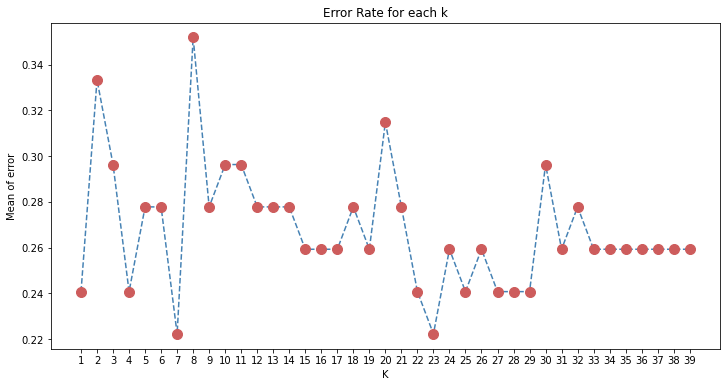

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="steelblue", linestyle="dashed", marker="o", markersize=10, mec="indianred", mfc="indianred")
plt.title("Error Rate for each k")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of error")

In [104]:
# define kNN model
knn = KNeighborsClassifier(n_neighbors=23)

# train kNN -> store data and label
knn.fit(x_train, y_train)

# predict
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

# classification report
print("Training performance:",
     classification_report(y_train, train_pred, target_names=target_names), sep="\n")

print("Testing performance:",
     classification_report(y_test, test_pred, target_names=target_names), sep="\n")

Training performance:
              precision    recall  f1-score   support

     class_0       0.85      0.88      0.86        40
     class_1       0.82      0.57      0.67        49
     class_2       0.53      0.74      0.62        35

    accuracy                           0.72       124
   macro avg       0.74      0.73      0.72       124
weighted avg       0.75      0.72      0.72       124

Testing performance:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.88      0.68      0.77        22
     class_2       0.56      0.77      0.65        13

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.77        54
weighted avg       0.81      0.78      0.78        54

